In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification (2).csv


In [1]:
import io

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

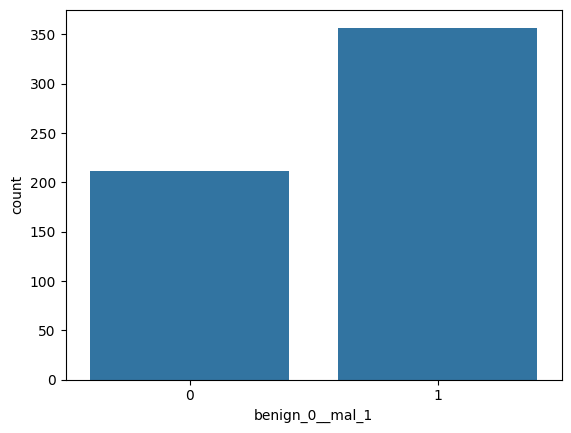

In [6]:
sns.countplot(x = 'benign_0__mal_1',data = df) #its preferred to use countplot firstly in a classification problem

In [7]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [8]:
df.corr()['benign_0__mal_1'].sort_values() #it means seeing the correlation w.r.t the outcome and sort values means sorting the values

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

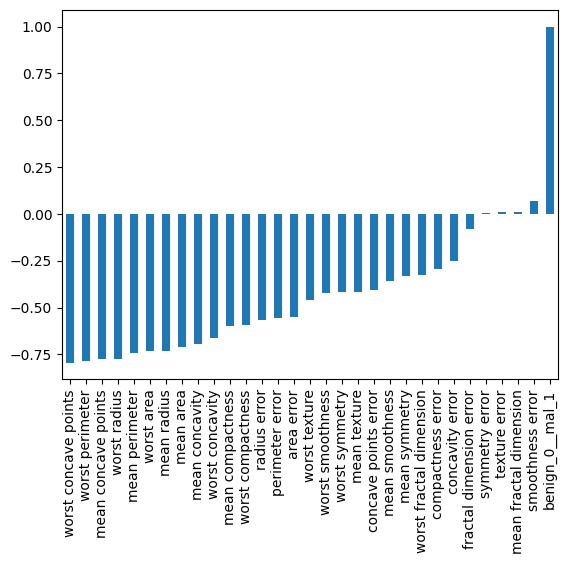

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar') #seeing which is positively and which is negatively correlated to the benign_0__mal_1

<Axes: >

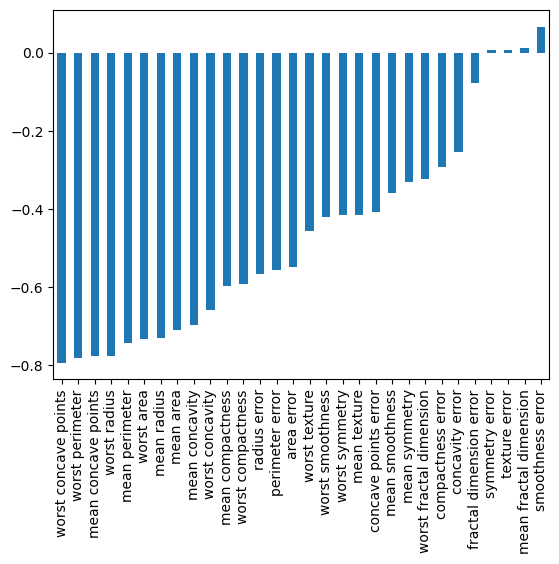

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar') #except the last as it will obviously show 100% correlation

<Axes: >

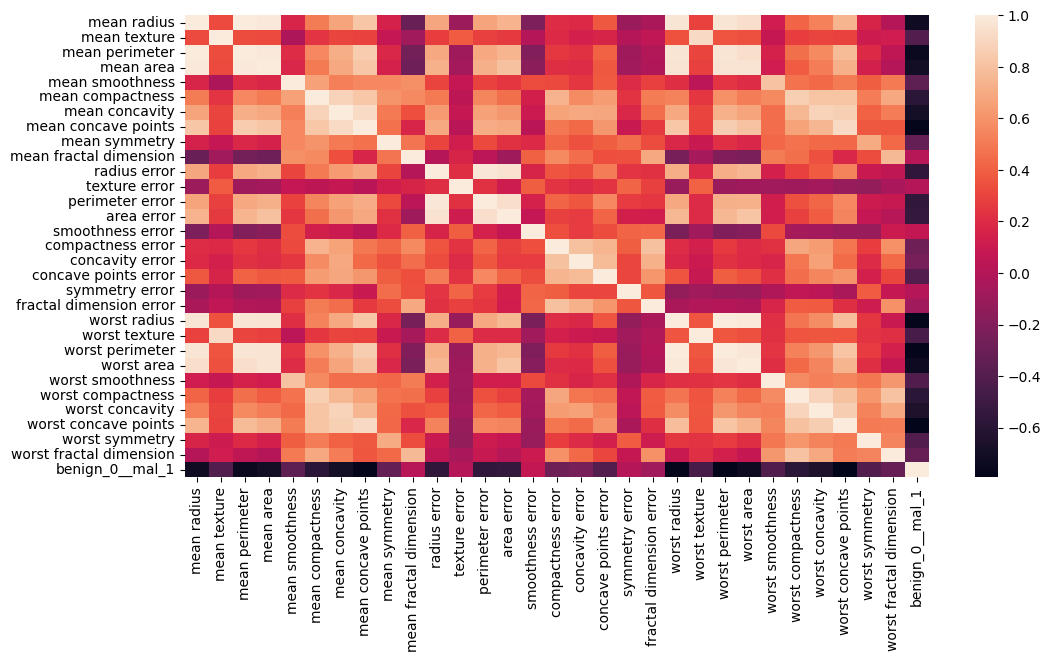

In [11]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())

In [12]:
X = df.drop('benign_0__mal_1',axis = 1).values
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense,Dropout

In [21]:
X_train.shape #means 426 rows and 30 features

(426, 30)

In [22]:
model = Sequential()


model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu')) #we cut the 30 to half in 15

#IN BINARY CLASSIFICATION PROBLEM SIGMOID IS USED IN THE LAST ACTIVATION
model.add(Dense(1,activation = 'sigmoid')) #last layer , hence it is 1

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [23]:
#training and testing the data
model.fit(x = X_train,y = y_train,epochs = 200,validation_data=(X_test,y_test))

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.7052 - val_loss: 0.6723
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6634 - val_loss: 0.6409
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6287 - val_loss: 0.6072
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6015 - val_loss: 0.5716
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5573 - val_loss: 0.5329
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5207 - val_loss: 0.4922
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4806 - val_loss: 0.4511
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4529 - val_loss: 0.4006
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4086 - val_loss: 0.3583
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3534 - val_loss: 0.3181
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3352 - val_loss: 0.2879
Epoch 12/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses

,loss,val_loss
0,0.696311,0.672287
1,0.656795,0.640911
2,0.626204,0.607235
3,0.593773,0.571606
4,0.561073,0.532860
...,...,...
195,0.040001,0.111806
196,0.041402,0.110107
197,0.043711,0.118349
198,0.040863,0.112069


<Axes: >

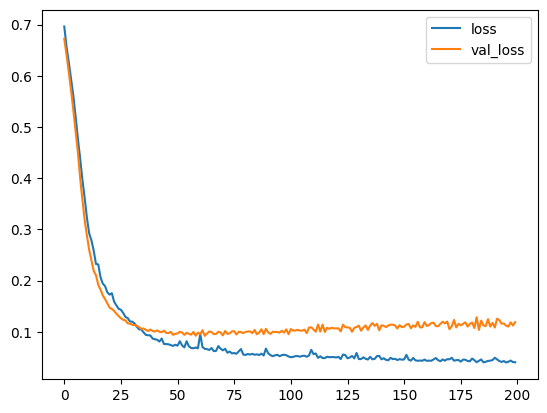

In [26]:
losses.plot() #here our model is overfitting as the val_loss(test data) is on a much higher level(spiky noises like structures too) than the loss(training data), both the losses go down on the same level however the val_loss increases and keeps on inc which implies that we have used too many epochs over here

In [29]:
#now we'll learn how to use a callback, a callback called earlystopping stops the model training when it starts to overtrain

In [27]:
model = Sequential()


model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu')) #we cut the 30 to half in 15

#IN BINARY CLASSIFICATION PROBLEM SIGMOID IS USED IN THE LAST ACTIVATION
model.add(Dense(1,activation = 'sigmoid')) #last layer , hence it is 1

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
#the monitor is the thing we our monitoring in the overfitted data which in this case is the validation loss(val_loss aka test data)
#keep in mind--> if the metric is accuracy then the mode is 'max' because accuracy needs to be maximized and if the metric is loss then it needs to be minimized so the mode is 'min
# there is another mode 'auto' which detects automatically most of the time however user defined mode putting such as 'min' 'max' is preferred


early_stop = EarlyStopping(monitor = 'val_loss',mode = 'min',verbose = 1,patience =25) #patience 25 means we'll wait for 25 epochs more even after we have detected the stopping point due to the noise that could occur.


In [32]:
model.fit(x = X_train,y = y_train,epochs = 600,validation_data=(X_test,y_test),callbacks = [early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6887 - val_loss: 0.6781
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6710 - val_loss: 0.6563
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6482 - val_loss: 0.6338
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6185 - val_loss: 0.6084
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5900 - val_loss: 0.5829
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5727 - val_loss: 0.5544
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5489 - val_loss: 0.5262
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4941 - val_loss: 0.5010
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4855 - val_loss: 0.4767
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4941 - val_loss: 0.4517
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4385 - val_loss: 0.4300
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

<Axes: >

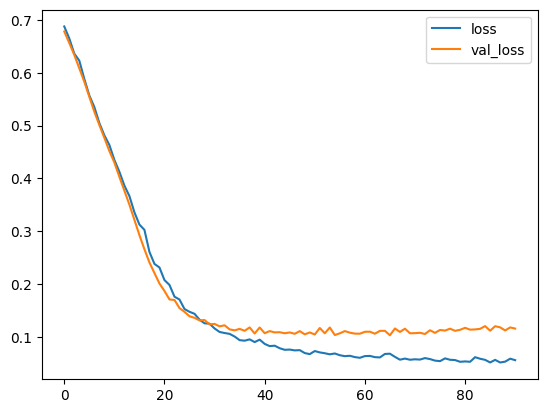

In [33]:
new_loss = pd.DataFrame(model.history.history)
new_loss.plot() #this is a correct graph that is required(the spiky noises like structures are similar too)

In [34]:
#next to prevent over fitting we'll use dropout layers which will turn off a percentage of neurons randomly

In [35]:
from tensorflow.keras.layers import Dropout

In [36]:
#every time we copy paste the down code, it means we are training the new model here we'll use both early stopping as well as dropout , previously we used only early stopping and saw the results
model = Sequential()


model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5)) #the no. after the dropout is the rate of percentage of neuron that we want to turn off(1 is 100% and 0 is 0%, here 0.5 is 50%)

model.add(Dense(15,activation = 'relu')) #we cut the 30 to half in 15
model.add(Dropout(0.5)) #also each neuron will have 50% probability of being turned off

#IN BINARY CLASSIFICATION PROBLEM SIGMOID IS USED IN THE LAST ACTIVATION
model.add(Dense(1,activation = 'sigmoid')) #last layer , hence it is 1

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [37]:
model.fit(x = X_train,y = y_train,epochs = 600,validation_data=(X_test,y_test),callbacks = [early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7310 - val_loss: 0.6830
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6814 - val_loss: 0.6574
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6845 - val_loss: 0.6386
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6493 - val_loss: 0.6219
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6602 - val_loss: 0.6016
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6263 - val_loss: 0.5834
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5978 - val_loss: 0.5558
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6095 - val_loss: 0.5334
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5547 - val_loss: 0.5153
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5290 - val_loss: 0.4866
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5330 - val_loss: 0.4565
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

<Axes: >

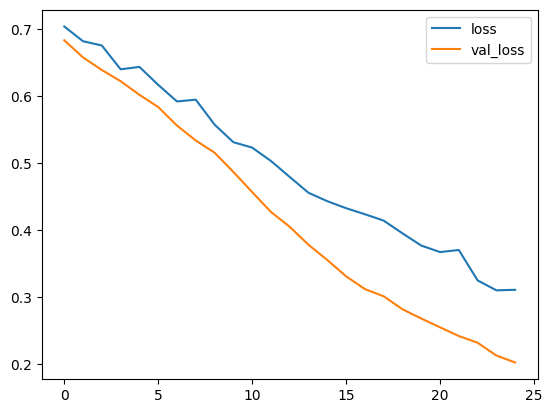

In [38]:
#analyzing the above loss now as done in others
loss3 = pd.DataFrame(model.history.history)
loss3.plot()

#this is even better as we see that the training loss and the validation loss are together going down and eventually flattening at the end at the same level, this is a much improved performance and absolutely fantastic

In [40]:
#now we'll do a full evaluation on classes based off on a classification task(either 0 or 1) instead of model.predict(X_test) we say model.predict_classes(X_test)

In [46]:
# predictions = model.predict(X_test)
predictions = np.argmax(model.predict(X_test),axis=1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [48]:
predictions = (model.predict(X_test) > 0.5)*1 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [51]:
predictions_n = predictions.flatten()
predictions_n

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions_n))
print(confusion_matrix(y_test,predictions_n))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        55
           1       0.95      0.99      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

[[50  5]
 [ 1 87]]
